In [1]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import api_key
from pprint import pprint
from pandas.plotting import table
import seaborn as sns
%matplotlib inline

crime data for 2018, 2019, and 2020
url for data: https://www.njsp.org/ucr/uniform-crime-reports.shtml

In [2]:
#pulling in data set to process and cleaning the data

crime_2018_df = pd.read_excel ('Data/UCR_crimetrend_2018.xlsx', sheet_name='Essex', header=3)
crime_2018_df.head()


,ORINumber,Agency,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total,Months
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NJ0070100,BELLEVILLE PD,36075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Number of Offenses,NaN,0.0,1.0,17.0,44.0,87.0,414.0,88.0,651.0,12.0
3,NaN,"Rate Per 100,000",NaN,0.0,2.8,47.1,122.0,241.2,1147.6,243.9,1804.6,NaN
4,NaN,Number of Clearances,NaN,0.0,0.0,10.0,30.0,9.0,55.0,3.0,107.0,NaN


In [3]:
crime_2018_df.shape


(188, 12)

In [4]:
crime_newark=crime_2018_df.iloc[103:121, 0:11]
crime_newark

,ORINumber,Agency,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
103,NJ0072700,NEW JERSEY INSTITUTE OF TECHNOLOGY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,Number of Offenses,NaN,0.0,1.0,1.0,2.0,5.0,65.0,0.0,74.0
105,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,NaN,Number of Clearances,NaN,0.0,0.0,0.0,1.0,4.0,11.0,0.0,16.0
107,NaN,Percent Cleared,NaN,0.0,0.0,0.0,50.0,80.0,17.0,0.0,22.0
108,NaN,Number of Arrests,NaN,0.0,0.0,0.0,4.0,2.0,11.0,0.0,17.0
109,NJ0073200,NEW JERSEY TRANSIT POLICE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,Number of Offenses,NaN,0.0,0.0,8.0,13.0,1.0,283.0,4.0,309.0
111,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,NaN,Number of Clearances,NaN,0.0,0.0,5.0,8.0,0.0,125.0,1.0,139.0


In [7]:
crime_newark1=crime_2018_df.iloc[145:151, 0:11]
crime_newark1

,ORINumber,Agency,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
145,NJ0073000,RUTGERS NEWARK CAMPUS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,Number of Offenses,NaN,0.0,4.0,3.0,16.0,11.0,252.0,6.0,292.0
147,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,NaN,Number of Clearances,NaN,0.0,0.0,2.0,13.0,7.0,21.0,2.0,45.0
149,NaN,Percent Cleared,NaN,0.0,0.0,67.0,81.0,64.0,8.0,33.0,15.0
150,NaN,Number of Arrests,NaN,0.0,0.0,1.0,15.0,7.0,24.0,2.0,49.0


In [8]:
crime_newark2=crime_2018_df.iloc[157:163, 0:11]
crime_newark2

,ORINumber,Agency,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
157,NJ007SP,STATE POLICE ESSEX COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,NaN,Number of Offenses,NaN,0.0,1.0,2.0,4.0,0.0,9.0,10.0,26.0
159,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,NaN,Number of Clearances,NaN,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0
161,NaN,Percent Cleared,NaN,0.0,0.0,0.0,75.0,0.0,0.0,0.0,12.0
162,NaN,Number of Arrests,NaN,0.0,0.0,3.0,2.0,0.0,2.0,1.0,8.0


In [9]:
crime_totals_18=pd.concat([crime_newark, crime_newark1,crime_newark2])
crime_totals_18

,ORINumber,Agency,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
103,NJ0072700,NEW JERSEY INSTITUTE OF TECHNOLOGY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,Number of Offenses,NaN,0.0,1.0,1.0,2.0,5.0,65.0,0.0,74.0
105,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,NaN,Number of Clearances,NaN,0.0,0.0,0.0,1.0,4.0,11.0,0.0,16.0
107,NaN,Percent Cleared,NaN,0.0,0.0,0.0,50.0,80.0,17.0,0.0,22.0
108,NaN,Number of Arrests,NaN,0.0,0.0,0.0,4.0,2.0,11.0,0.0,17.0
109,NJ0073200,NEW JERSEY TRANSIT POLICE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,Number of Offenses,NaN,0.0,0.0,8.0,13.0,1.0,283.0,4.0,309.0
111,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,NaN,Number of Clearances,NaN,0.0,0.0,5.0,8.0,0.0,125.0,1.0,139.0


In [10]:
#minimizing the data to a smaller data set
crime_newark2=crime_totals_18.drop(['ORINumber', 'Agency'], axis=1)
crime_newark2

,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
103,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,0.0,1.0,1.0,2.0,5.0,65.0,0.0,74.0
105,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,NaN,0.0,0.0,0.0,1.0,4.0,11.0,0.0,16.0
107,NaN,0.0,0.0,0.0,50.0,80.0,17.0,0.0,22.0
108,NaN,0.0,0.0,0.0,4.0,2.0,11.0,0.0,17.0
109,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,0.0,0.0,8.0,13.0,1.0,283.0,4.0,309.0
111,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,NaN,0.0,0.0,5.0,8.0,0.0,125.0,1.0,139.0


In [11]:
#translating the NaN to 0.0 for calculations
crime_newark2.fillna(0)

,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.0,0.0,1.0,1.0,2.0,5.0,65.0,0.0,74.0
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,1.0,4.0,11.0,0.0,16.0
107,0.0,0.0,0.0,0.0,50.0,80.0,17.0,0.0,22.0
108,0.0,0.0,0.0,0.0,4.0,2.0,11.0,0.0,17.0
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,0.0,0.0,0.0,8.0,13.0,1.0,283.0,4.0,309.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,5.0,8.0,0.0,125.0,1.0,139.0


In [12]:
sum_column = crime_newark2.sum(axis=0, skipna = True)
print(sum_column)


Population    282258.0
Murder           163.6
Rape             231.1
Robbery         1422.1
Assault         2759.2
Burglary        1553.8
Larceny         5276.6
Auto Theft      2825.9
Total          13576.2
dtype: float64


In [13]:
#need to calculate the percentage of each so I can get pie chart
murder_percent=(sum_column['Murder'] / sum_column['Total'] * 100)
rape_percent=(sum_column['Rape'] / sum_column['Total'] * 100)
robbery_percent=(sum_column['Robbery'] / sum_column['Total'] * 100)
assault_percent=(sum_column['Assault'] / sum_column['Total'] * 100)
burglary_percent=(sum_column['Burglary'] / sum_column['Total'] * 100)
larceny_percent=(sum_column['Larceny'] / sum_column['Total'] * 100)
auto_theft_percent=(sum_column['Auto Theft'] / sum_column['Total'] * 100)
total=(sum_column['Total'])

In [14]:
#murder_percent
#rape_percent
#robbery_percent
#assault_percent
#burglary_percent
#larceny_percent
#auto_theft_percent
#total

In [15]:
#formating

summary_df = pd.DataFrame({
    'Murder':[murder_percent],
    'Rape': [rape_percent],
    'Robbery':[robbery_percent],
    'Assault':[assault_percent],
    'Burglary':[burglary_percent],
    'Larceny': [larceny_percent],
    'Auto Theft': [auto_theft_percent]
    })

summary_df


,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft
0,1.20505,1.702244,10.474949,20.323802,11.445029,38.866546,20.815103


In [16]:


sum_column2 = summary_df.sum(axis=0, skipna = True)
print(sum_column2)


Murder         1.205050
Rape           1.702244
Robbery       10.474949
Assault       20.323802
Burglary      11.445029
Larceny       38.866546
Auto Theft    20.815103
dtype: float64


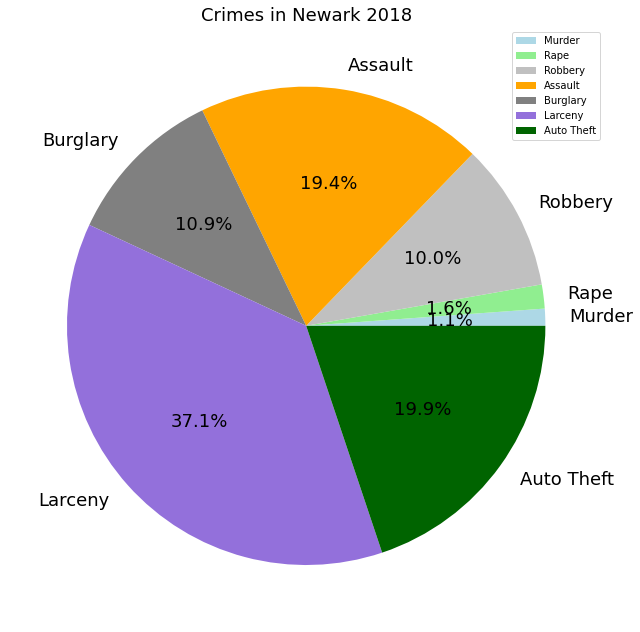

In [17]:
my_colors=['lightblue','lightgreen',
           'silver','orange','gray','mediumpurple','darkgreen']


sum_column2 .plot.pie( fontsize=18, subplots=True,colors=my_colors,y = 'Crime Types',
                      figsize=(11,11),autopct='%1.1f%%', legend=True, )



plt.legend(loc='upper right')
plt.title('Crimes in Newark 2018',fontsize=18)
plt.ylabel('')
plt.savefig('output_data/crime_pie_2018.png')

In [18]:
summary_df = pd.DataFrame({
    'Murder':[murder_percent],
    'Rape': [rape_percent],
    'Robbery':[robbery_percent],
    'Assault':[assault_percent],
    'Burglary':[burglary_percent],
    'Larceny': [larceny_percent],
    'Auto Theft': [auto_theft_percent],
    'Total':[total]})

summary_df


summary_table=summary_df.style.format({'Murder': "{:,.2f}%",'Rape': "{:,.2f}%",'Robbery': "{:,.2f}%",
                               'Assault': "{:,.2f}%", 'Burglary': "{:,.2f}%", 'Larceny': "{:,.2f}%",
                               'Auto Theft' : "{:,.2f}%" ,'Total':"{:,.2f}"}) 
summary_table


,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
0,1.21%,1.70%,10.47%,20.32%,11.45%,38.87%,20.82%,"13,576.20"


In [19]:
summary_table.to_excel("output_data/Crime_percent_summary_2018.xlsx", index = False)

Crime Data and informtation for 2019 below:

In [20]:
#pulling in data set to process and cleaning the data

crime_2019_df = pd.read_excel ('Data/UCR_crimetrend_2019.xlsx', sheet_name='Essex', header=3)

In [21]:

crime_2019_df.shape

(188, 12)

In [22]:
crime_newark=crime_2019_df.iloc[103:121, 0:11]
crime_newark

,ORINumber,Agency,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
103,NJ0072700,NEW JERSEY INSTITUTE OF TECHNOLOGY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,Number of Offenses,NaN,0.0,3.0,2.0,3.0,4.0,64.0,4.0,80.0
105,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,NaN,Number of Clearances,NaN,0.0,1.0,1.0,3.0,4.0,21.0,1.0,31.0
107,NaN,Percent Cleared,NaN,0.0,33.0,50.0,100.0,100.0,33.0,25.0,39.0
108,NaN,Number of Arrests,NaN,0.0,0.0,1.0,8.0,8.0,14.0,3.0,34.0
109,NJ0073200,NEW JERSEY TRANSIT POLICE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,Number of Offenses,NaN,0.0,0.0,3.0,13.0,0.0,289.0,6.0,311.0
111,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,NaN,Number of Clearances,NaN,0.0,0.0,1.0,6.0,0.0,137.0,1.0,145.0


In [23]:
crime_newark1=crime_2019_df.iloc[145:151, 0:11]
crime_newark1


,ORINumber,Agency,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
145,NJ0073000,RUTGERS NEWARK CAMPUS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,Number of Offenses,NaN,0.0,3.0,5.0,7.0,2.0,190.0,5.0,212.0
147,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,NaN,Number of Clearances,NaN,0.0,0.0,4.0,6.0,1.0,16.0,1.0,28.0
149,NaN,Percent Cleared,NaN,0.0,0.0,80.0,86.0,50.0,8.0,20.0,13.0
150,NaN,Number of Arrests,NaN,0.0,0.0,4.0,14.0,2.0,16.0,0.0,36.0


In [24]:
crime_newark2=crime_2019_df.iloc[157:163, 0:11]
crime_newark2

,ORINumber,Agency,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
157,NJ007SP00,STATE POLICE ESSEX COUNTY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,NaN,Number of Offenses,NaN,0.0,0.0,0.0,5.0,3.0,6.0,4.0,18.0
159,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,NaN,Number of Clearances,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
161,NaN,Percent Cleared,NaN,0.0,0.0,0.0,20.0,0.0,17.0,0.0,11.0
162,NaN,Number of Arrests,NaN,0.0,0.0,0.0,5.0,2.0,8.0,1.0,16.0


In [25]:
crime_totals_19=pd.concat([crime_newark, crime_newark1,crime_newark2])
crime_totals_19

,ORINumber,Agency,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
103,NJ0072700,NEW JERSEY INSTITUTE OF TECHNOLOGY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,Number of Offenses,NaN,0.0,3.0,2.0,3.0,4.0,64.0,4.0,80.0
105,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,NaN,Number of Clearances,NaN,0.0,1.0,1.0,3.0,4.0,21.0,1.0,31.0
107,NaN,Percent Cleared,NaN,0.0,33.0,50.0,100.0,100.0,33.0,25.0,39.0
108,NaN,Number of Arrests,NaN,0.0,0.0,1.0,8.0,8.0,14.0,3.0,34.0
109,NJ0073200,NEW JERSEY TRANSIT POLICE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,Number of Offenses,NaN,0.0,0.0,3.0,13.0,0.0,289.0,6.0,311.0
111,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,NaN,Number of Clearances,NaN,0.0,0.0,1.0,6.0,0.0,137.0,1.0,145.0


In [26]:
#minimizing the data to a smaller data set
crime_newark2=crime_totals_19.drop(['ORINumber', 'Agency'], axis=1)
crime_newark2

,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
103,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,0.0,3.0,2.0,3.0,4.0,64.0,4.0,80.0
105,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,NaN,0.0,1.0,1.0,3.0,4.0,21.0,1.0,31.0
107,NaN,0.0,33.0,50.0,100.0,100.0,33.0,25.0,39.0
108,NaN,0.0,0.0,1.0,8.0,8.0,14.0,3.0,34.0
109,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,0.0,0.0,3.0,13.0,0.0,289.0,6.0,311.0
111,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,NaN,0.0,0.0,1.0,6.0,0.0,137.0,1.0,145.0


In [27]:
#translating the NaN to 0.0 for calculations
crime_newark2.fillna(0)

,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.0,0.0,3.0,2.0,3.0,4.0,64.0,4.0,80.0
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,1.0,1.0,3.0,4.0,21.0,1.0,31.0
107,0.0,0.0,33.0,50.0,100.0,100.0,33.0,25.0,39.0
108,0.0,0.0,0.0,1.0,8.0,8.0,14.0,3.0,34.0
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,0.0,0.0,0.0,3.0,13.0,0.0,289.0,6.0,311.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,1.0,6.0,0.0,137.0,1.0,145.0


In [28]:
sum_column = crime_newark2.sum(axis=0, skipna = True)
print(sum_column)

Population    282258.0
Murder           174.2
Rape             202.5
Robbery         1330.3
Assault         2339.1
Burglary        1324.4
Larceny         4671.7
Auto Theft      2193.0
Total          11491.3
dtype: float64


In [29]:
#need to calculate the percentage of each so I can get pie chart
murder_percent=(sum_column['Murder'] / sum_column['Total'] * 100)
rape_percent=(sum_column['Rape'] / sum_column['Total'] * 100)
robbery_percent=(sum_column['Robbery'] / sum_column['Total'] * 100)
assault_percent=(sum_column['Assault'] / sum_column['Total'] * 100)
burglary_percent=(sum_column['Burglary'] / sum_column['Total'] * 100)
larceny_percent=(sum_column['Larceny'] / sum_column['Total'] * 100)
auto_theft_percent=(sum_column['Auto Theft'] / sum_column['Total'] * 100)
total=(sum_column['Total'])


In [30]:
#murder_percent
#rape_percent
#robbery_percent
#assault_percent
#burglary_percent
#larceny_percent
#auto_theft_percent
#total

In [31]:

#formating

summary_df = pd.DataFrame({
    'Murder':[murder_percent],
    'Rape': [rape_percent],
    'Robbery':[robbery_percent],
    'Assault':[assault_percent],
    'Burglary':[burglary_percent],
    'Larceny': [larceny_percent],
    'Auto Theft': [auto_theft_percent]
    })

summary_df


,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft
0,1.515929,1.762203,11.576584,20.355399,11.525241,40.654234,19.084003


In [32]:
sum_column2 = summary_df.sum(axis=0, skipna = True)
print(sum_column2)

Murder         1.515929
Rape           1.762203
Robbery       11.576584
Assault       20.355399
Burglary      11.525241
Larceny       40.654234
Auto Theft    19.084003
dtype: float64


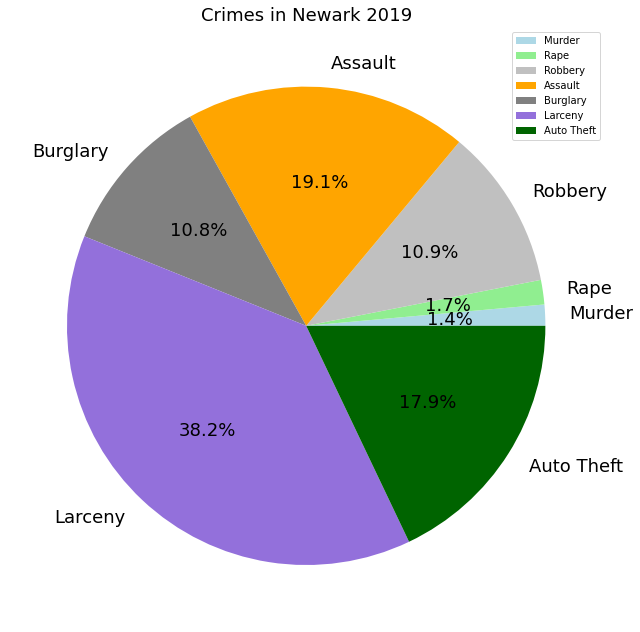

In [33]:
my_colors=['lightblue','lightgreen',
           'silver','orange','gray','mediumpurple','darkgreen']


sum_column2 .plot.pie( fontsize=18, subplots=True,colors=my_colors,y = 'Crime Types',
                      figsize=(11,11),autopct='%1.1f%%', legend=True, )



plt.legend(loc='upper right')
plt.title('Crimes in Newark 2019',fontsize=18)
plt.ylabel('')
plt.savefig('output_data/crime_pie.png')



In [34]:
summary_df = pd.DataFrame({
    'Murder':[murder_percent],
    'Rape': [rape_percent],
    'Robbery':[robbery_percent],
    'Assault':[assault_percent],
    'Burglary':[burglary_percent],
    'Larceny': [larceny_percent],
    'Auto Theft': [auto_theft_percent],
    'Total':[total]})

summary_df

,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
0,1.515929,1.762203,11.576584,20.355399,11.525241,40.654234,19.084003,11491.3


In [35]:
summary_table=summary_df.style.format({'Murder': "{:,.2f}%",'Rape': "{:,.2f}%",'Robbery': "{:,.2f}%",
                               'Assault': "{:,.2f}%", 'Burglary': "{:,.2f}%", 'Larceny': "{:,.2f}%",
                               'Auto Theft' : "{:,.2f}%" ,'Total':"{:,.2f}"}) 
summary_table


summary_table.to_excel("output_data/Crime_percent_summary_2019.xlsx", index = False)


Crime data from 2020 below information. data is from 2020_UCR_Jan-Sept_v2. covering only months Jan-Sept for 2020

In [36]:
#pulling in data set to process and cleaning the data

crime_2020_df = pd.read_excel ('Data/2020_UCR_Jan-Sept_v2.xlsx', sheet_name='Essex', header=3)
crime_2020_df.head()

,ORINumber,Agency,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total,Months
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NJ0070100,BELLEVILLE PD,36075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Number of Offenses,NaN,0.0,1.0,5.0,26.0,31.0,304.0,56.0,423.0,9.0
3,NaN,"Rate Per 100,000",NaN,0.0,2.8,13.9,72.1,85.9,842.7,155.2,1172.6,NaN
4,NaN,Number of Clearances,NaN,0.0,0.0,3.0,8.0,9.0,58.0,2.0,80.0,NaN


In [37]:
crime_2020_df.shape

(188, 12)

In [38]:
crime_newark=crime_2020_df.iloc[103:121, 0:11]
crime_newark

,ORINumber,Agency,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
103,NJ0072700,NEW JERSEY INSTITUTE OF TECHNOLOGY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,Number of Offenses,NaN,0.0,0.0,1.0,0.0,1.0,15.0,0.0,17.0
105,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,NaN,Number of Clearances,NaN,0.0,0.0,1.0,0.0,0.0,3.0,0.0,4.0
107,NaN,Percent Cleared,NaN,0.0,0.0,100.0,0.0,0.0,20.0,0.0,24.0
108,NaN,Number of Arrests,NaN,0.0,0.0,1.0,0.0,0.0,3.0,0.0,4.0
109,NJ0073200,NEW JERSEY TRANSIT POLICE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,Number of Offenses,NaN,0.0,0.0,0.0,13.0,1.0,103.0,7.0,124.0
111,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,NaN,Number of Clearances,NaN,0.0,0.0,0.0,6.0,0.0,52.0,2.0,60.0


In [39]:
crime_newark1=crime_2020_df.iloc[145:151, 0:11]
crime_newark1

,ORINumber,Agency,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
145,NJ0073000,RUTGERS NEWARK CAMPUS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,Number of Offenses,NaN,0.0,2.0,4.0,1.0,2.0,111.0,1.0,121.0
147,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,NaN,Number of Clearances,NaN,0.0,0.0,4.0,1.0,1.0,12.0,1.0,19.0
149,NaN,Percent Cleared,NaN,0.0,0.0,100.0,100.0,50.0,11.0,100.0,16.0
150,NaN,Number of Arrests,NaN,0.0,0.0,4.0,2.0,1.0,10.0,2.0,19.0


In [40]:
crime_newark2=crime_2020_df.iloc[157:163, 0:11]
crime_newark2

,ORINumber,Agency,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
157,NJ007SP00,STATE POLICE ESSEX COUNTY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,NaN,Number of Offenses,NaN,0.0,0.0,2.0,1.0,1.0,9.0,3.0,16.0
159,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,NaN,Number of Clearances,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
161,NaN,Percent Cleared,NaN,0.0,0.0,0.0,0.0,0.0,0.0,33.0,6.0
162,NaN,Number of Arrests,NaN,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0


In [41]:
crime_totals=pd.concat([crime_newark, crime_newark1,crime_newark2])
crime_totals

,ORINumber,Agency,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
103,NJ0072700,NEW JERSEY INSTITUTE OF TECHNOLOGY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,Number of Offenses,NaN,0.0,0.0,1.0,0.0,1.0,15.0,0.0,17.0
105,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,NaN,Number of Clearances,NaN,0.0,0.0,1.0,0.0,0.0,3.0,0.0,4.0
107,NaN,Percent Cleared,NaN,0.0,0.0,100.0,0.0,0.0,20.0,0.0,24.0
108,NaN,Number of Arrests,NaN,0.0,0.0,1.0,0.0,0.0,3.0,0.0,4.0
109,NJ0073200,NEW JERSEY TRANSIT POLICE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,Number of Offenses,NaN,0.0,0.0,0.0,13.0,1.0,103.0,7.0,124.0
111,NaN,"Rate Per 100,000",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,NaN,Number of Clearances,NaN,0.0,0.0,0.0,6.0,0.0,52.0,2.0,60.0


In [42]:
#minimizing the data to a smaller data set
crime_newark2=crime_totals.drop(['ORINumber', 'Agency'], axis=1)
crime_newark2

,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
103,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,0.0,0.0,1.0,0.0,1.0,15.0,0.0,17.0
105,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,NaN,0.0,0.0,1.0,0.0,0.0,3.0,0.0,4.0
107,NaN,0.0,0.0,100.0,0.0,0.0,20.0,0.0,24.0
108,NaN,0.0,0.0,1.0,0.0,0.0,3.0,0.0,4.0
109,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,0.0,0.0,0.0,13.0,1.0,103.0,7.0,124.0
111,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,NaN,0.0,0.0,0.0,6.0,0.0,52.0,2.0,60.0


In [43]:
#translating the NaN to 0.0 for calculations
crime_newark2.fillna(0)

,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.0,0.0,0.0,1.0,0.0,1.0,15.0,0.0,17.0
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,4.0
107,0.0,0.0,0.0,100.0,0.0,0.0,20.0,0.0,24.0
108,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,4.0
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,0.0,0.0,0.0,0.0,13.0,1.0,103.0,7.0,124.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,6.0,0.0,52.0,2.0,60.0


In [44]:
sum_column = crime_newark2.sum(axis=0, skipna = True)
print(sum_column)


Population    282258.0
Murder           107.4
Rape             133.7
Robbery          804.1
Assault         1826.0
Burglary         800.3
Larceny         3168.6
Auto Theft      1894.8
Total           8102.0
dtype: float64


In [45]:
#need to calculate the percentage of each so I can get pie chart
murder_percent=(sum_column['Murder'] / sum_column['Total'] * 100)
rape_percent=(sum_column['Rape'] / sum_column['Total'] * 100)
robbery_percent=(sum_column['Robbery'] / sum_column['Total'] * 100)
assault_percent=(sum_column['Assault'] / sum_column['Total'] * 100)
burglary_percent=(sum_column['Burglary'] / sum_column['Total'] * 100)
larceny_percent=(sum_column['Larceny'] / sum_column['Total'] * 100)
auto_theft_percent=(sum_column['Auto Theft'] / sum_column['Total'] * 100)
total=(sum_column['Total'])

In [46]:
#murder_percent
#rape_percent
#robbery_percent
#assault_percent
#burglary_percent
#larceny_percent
#auto_theft_percent
#total

In [47]:
#formating

summary_df = pd.DataFrame({
    'Murder':[murder_percent],
    'Rape': [rape_percent],
    'Robbery':[robbery_percent],
    'Assault':[assault_percent],
    'Burglary':[burglary_percent],
    'Larceny': [larceny_percent],
    'Auto Theft': [auto_theft_percent]
    })

summary_df


,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft
0,1.325599,1.65021,9.92471,22.537645,9.877808,39.108862,23.386818


In [48]:
sum_column2 = summary_df.sum(axis=0, skipna = True)
print(sum_column2)


Murder         1.325599
Rape           1.650210
Robbery        9.924710
Assault       22.537645
Burglary       9.877808
Larceny       39.108862
Auto Theft    23.386818
dtype: float64


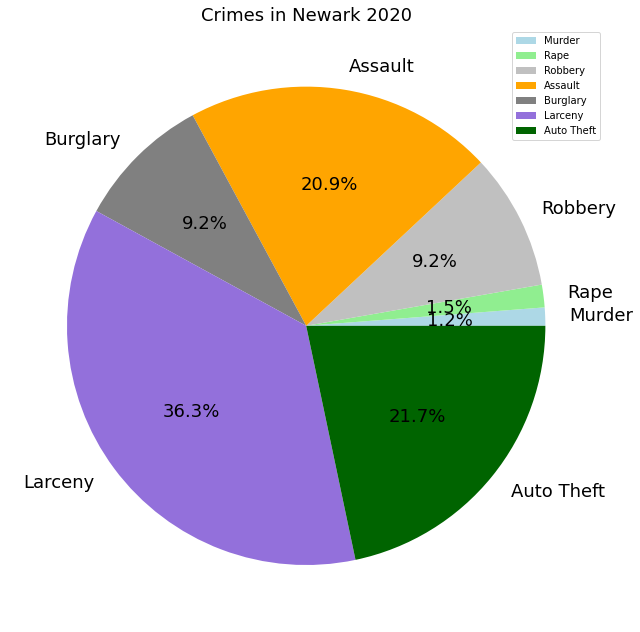

In [49]:
my_colors=['lightblue','lightgreen',
           'silver','orange','gray','mediumpurple','darkgreen']


sum_column2 .plot.pie( fontsize=18, subplots=True,colors=my_colors,y = 'Crime Types',
                      figsize=(11,11),autopct='%1.1f%%', legend=True, )



plt.legend(loc='upper right')
plt.title('Crimes in Newark 2020',fontsize=18)
plt.ylabel('')
plt.savefig('output_data/crime_pie.png')

In [50]:
summary_df = pd.DataFrame({
    'Murder':[murder_percent],
    'Rape': [rape_percent],
    'Robbery':[robbery_percent],
    'Assault':[assault_percent],
    'Burglary':[burglary_percent],
    'Larceny': [larceny_percent],
    'Auto Theft': [auto_theft_percent],
    'Total':[total]})

summary_df


summary_table=summary_df.style.format({'Murder': "{:,.2f}%",'Rape': "{:,.2f}%",'Robbery': "{:,.2f}%",
                               'Assault': "{:,.2f}%", 'Burglary': "{:,.2f}%", 'Larceny': "{:,.2f}%",
                               'Auto Theft' : "{:,.2f}%" ,'Total':"{:,.2f}"}) 
summary_table

,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
0,1.33%,1.65%,9.92%,22.54%,9.88%,39.11%,23.39%,"8,102.00"


In [51]:
summary_table.to_excel("output_data/Crime_percent_summary_2020.xlsx", index = False)

combined all data totals for 2018, 2019, 2020: crime data for 2018, 2019, and 2020. combined totals calculations with graph
url for data: https://www.njsp.org/ucr/uniform-crime-reports.shtml

In [5]:
#pulling in data set to process and cleaning the data

crime_totals_2018_df = pd.read_excel ('output_data/Crime_percent_summary_2018.xlsx',)
crime_totals_2018_df.head()


,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
0,1.20505,1.702244,10.474949,20.323802,11.445029,38.866546,20.815103,13576.2


In [6]:
#totals for 2018
crime_totals_2018_df.rename(index={0:'2018 Crime'}, inplace=True)
crime_totals_2018_df

,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
2018 Crime,1.20505,1.702244,10.474949,20.323802,11.445029,38.866546,20.815103,13576.2


In [7]:
crime_totals_2019_df = pd.read_excel ('output_data/Crime_percent_summary_2019.xlsx',)
crime_totals_2019_df.head()

,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
0,1.515929,1.762203,11.576584,20.355399,11.525241,40.654234,19.084003,11491.3


In [8]:
#totals for 2019
crime_totals_2019_df.rename(index={0:'2019 Crime'}, inplace=True)
crime_totals_2019_df

,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
2019 Crime,1.515929,1.762203,11.576584,20.355399,11.525241,40.654234,19.084003,11491.3


In [9]:
#totals for 2020
crime_totals_2020_df = pd.read_excel ('output_data/Crime_percent_summary_2020.xlsx',)
crime_totals_2020_df.head()

,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
0,1.325599,1.65021,9.92471,22.537645,9.877808,39.108862,23.386818,8102


In [10]:
crime_totals_2020_df.rename(index={0:'2020 Crime'}, inplace=True)
crime_totals_2020_df

,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
2020 Crime,1.325599,1.65021,9.92471,22.537645,9.877808,39.108862,23.386818,8102


In [11]:
crime_summary=pd.concat([crime_totals_2018_df, crime_totals_2019_df,crime_totals_2020_df])
crime_summary

,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
2018 Crime,1.205050,1.702244,10.474949,20.323802,11.445029,38.866546,20.815103,13576.2
2019 Crime,1.515929,1.762203,11.576584,20.355399,11.525241,40.654234,19.084003,11491.3
2020 Crime,1.325599,1.650210,9.924710,22.537645,9.877808,39.108862,23.386818,8102.0


In [12]:
crime_summary.reset_index()
crime_summary.head()


,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total
2018 Crime,1.205050,1.702244,10.474949,20.323802,11.445029,38.866546,20.815103,13576.2
2019 Crime,1.515929,1.762203,11.576584,20.355399,11.525241,40.654234,19.084003,11491.3
2020 Crime,1.325599,1.650210,9.924710,22.537645,9.877808,39.108862,23.386818,8102.0


In [13]:
crime_summary.to_csv("output_data/Crime_rates_2018_2019_2020.csv", index = False)

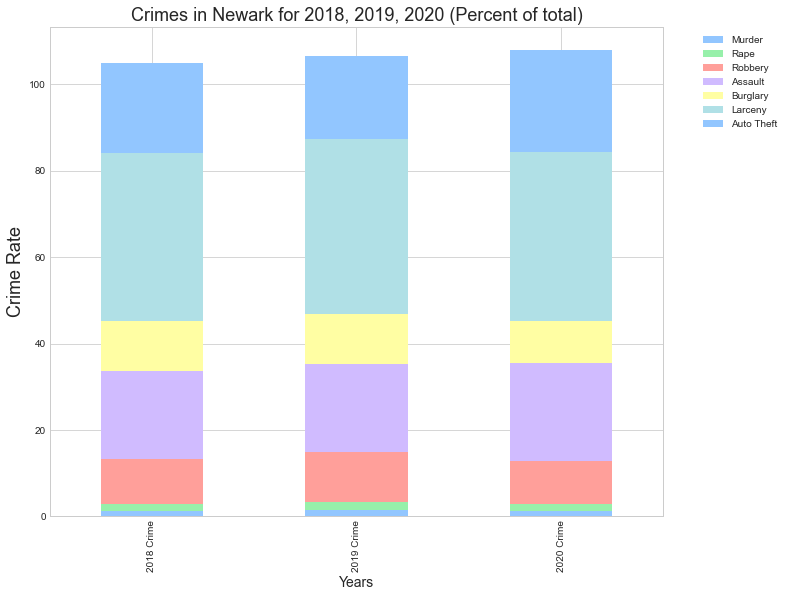

In [15]:
axis = crime_summary[["Murder", "Rape","Robbery","Assault","Burglary","Larceny","Auto Theft",]
                    ].plot(kind="bar", stacked=True,figsize=(11, 9))
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))


plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-pastel')



plt.ylabel("Crime Rate", fontsize=18)
plt.xlabel("Years", fontsize=14)
plt.title("Crimes in Newark for 2018, 2019, 2020 (Percent of total)", fontsize=18)
fig = axis.get_figure()
fig.savefig("output_data/Years_crime.png")
plt.show()